# Artificial Neural Networks Basics

In [1]:
import numpy as np
import os
import tensorflow as tf

# make notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# graph imports and settings
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


## Perceptrons

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:,(2, 3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

/home/anoop/openai/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [3]:
y_pred

array([1])

In [4]:
a = - per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = - per_clf.intercept_ / per_clf.coef_[0][1]
axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_pred = per_clf.predict(X_new)
y_pred.reshape(x0.shape)

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

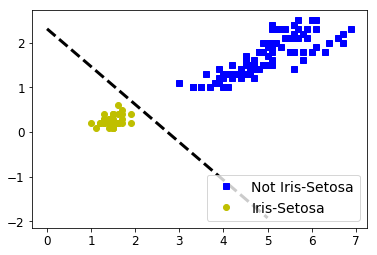

In [5]:
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] +b], "k--", linewidth=3)
plt.legend(loc="lower right", fontsize=14)
plt.show()

## Multi Layer Perceptron - Feed Forward Network

### Training a MLP using TF.learn - high level API similar to scikit-learn API

In [6]:
# Using API tf.Learn to train an MLP, similar to Scikit Learn API
# The DNNCLassifier defines a DNN with any number of hidden layers and softmax layer to output estimated class probabilities
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("tmp/data/")

Extracting tmp/data/train-images-idx3-ubyte.gz
Extracting tmp/data/train-labels-idx1-ubyte.gz
Extracting tmp/data/t10k-images-idx3-ubyte.gz
Extracting tmp/data/t10k-labels-idx1-ubyte.gz


In [7]:
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

In [8]:
config = tf.contrib.learn.RunConfig(tf_random_seed=42)
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300, 100], n_classes=10, feature_columns=feature_columns)
dnn_clf.fit(x=X_train, y=y_train, batch_size=50, steps=40000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_every_n_hours': 10000, '_num_ps_replicas': 0, '_task_id': 0, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_is_chief': True, '_save_checkpoints_steps': None, '_task_type': None, '_save_summary_steps': 100, '_keep_checkpoint_max': 5, '_session_config': None, '_model_dir': '/tmp/tmp3qz214jo', '_num_worker_replicas': 0, '_log_step_count_steps': 100, '_save_checkpoints_secs': 600, '_tf_random_seed': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc0d3503f98>, '_environment': 'local', '_master': '', '_evaluation_master': ''}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for 

INFO:tensorflow:global_step/sec: 259.28
INFO:tensorflow:loss = 0.028554374, step = 5501 (0.386 sec)
INFO:tensorflow:global_step/sec: 263.863
INFO:tensorflow:loss = 0.049069233, step = 5601 (0.379 sec)
INFO:tensorflow:global_step/sec: 250.406
INFO:tensorflow:loss = 0.01320843, step = 5701 (0.399 sec)
INFO:tensorflow:global_step/sec: 247.93
INFO:tensorflow:loss = 0.008534388, step = 5801 (0.404 sec)
INFO:tensorflow:global_step/sec: 237.119
INFO:tensorflow:loss = 0.05376948, step = 5901 (0.421 sec)
INFO:tensorflow:global_step/sec: 237.522
INFO:tensorflow:loss = 0.10866829, step = 6001 (0.421 sec)
INFO:tensorflow:global_step/sec: 243.298
INFO:tensorflow:loss = 0.021493256, step = 6101 (0.411 sec)
INFO:tensorflow:global_step/sec: 260.501
INFO:tensorflow:loss = 0.020208078, step = 6201 (0.384 sec)
INFO:tensorflow:global_step/sec: 261.447
INFO:tensorflow:loss = 0.07059438, step = 6301 (0.382 sec)
INFO:tensorflow:global_step/sec: 256.419
INFO:tensorflow:loss = 0.037351646, step = 6401 (0.390 s

INFO:tensorflow:global_step/sec: 236.385
INFO:tensorflow:loss = 0.0046184035, step = 13601 (0.422 sec)
INFO:tensorflow:global_step/sec: 256.533
INFO:tensorflow:loss = 0.0026922757, step = 13701 (0.391 sec)
INFO:tensorflow:global_step/sec: 264.852
INFO:tensorflow:loss = 0.0048165177, step = 13801 (0.377 sec)
INFO:tensorflow:global_step/sec: 256.74
INFO:tensorflow:loss = 0.0026757224, step = 13901 (0.389 sec)
INFO:tensorflow:global_step/sec: 254.118
INFO:tensorflow:loss = 0.0015390974, step = 14001 (0.394 sec)
INFO:tensorflow:global_step/sec: 258.877
INFO:tensorflow:loss = 0.009331654, step = 14101 (0.387 sec)
INFO:tensorflow:global_step/sec: 256.207
INFO:tensorflow:loss = 0.005641539, step = 14201 (0.390 sec)
INFO:tensorflow:global_step/sec: 257.759
INFO:tensorflow:loss = 0.0015979143, step = 14301 (0.388 sec)
INFO:tensorflow:global_step/sec: 261.304
INFO:tensorflow:loss = 0.0008208848, step = 14401 (0.382 sec)
INFO:tensorflow:global_step/sec: 256.705
INFO:tensorflow:loss = 0.0010688539

INFO:tensorflow:global_step/sec: 257.362
INFO:tensorflow:loss = 0.0014631025, step = 21601 (0.388 sec)
INFO:tensorflow:global_step/sec: 258.326
INFO:tensorflow:loss = 0.0006735676, step = 21701 (0.388 sec)
INFO:tensorflow:global_step/sec: 262.187
INFO:tensorflow:loss = 0.0007775206, step = 21801 (0.381 sec)
INFO:tensorflow:global_step/sec: 262.21
INFO:tensorflow:loss = 0.0005779263, step = 21901 (0.383 sec)
INFO:tensorflow:global_step/sec: 247.033
INFO:tensorflow:loss = 9.6407544e-05, step = 22001 (0.403 sec)
INFO:tensorflow:global_step/sec: 264.848
INFO:tensorflow:loss = 0.00036330067, step = 22101 (0.378 sec)
INFO:tensorflow:global_step/sec: 247.679
INFO:tensorflow:loss = 0.0013617161, step = 22201 (0.404 sec)
INFO:tensorflow:global_step/sec: 244.183
INFO:tensorflow:loss = 0.001794919, step = 22301 (0.408 sec)
INFO:tensorflow:global_step/sec: 253.622
INFO:tensorflow:loss = 0.001674848, step = 22401 (0.400 sec)
INFO:tensorflow:global_step/sec: 233.859
INFO:tensorflow:loss = 0.00134203

INFO:tensorflow:global_step/sec: 264.73
INFO:tensorflow:loss = 0.0005627351, step = 29601 (0.378 sec)
INFO:tensorflow:global_step/sec: 260.758
INFO:tensorflow:loss = 0.0003899826, step = 29701 (0.383 sec)
INFO:tensorflow:global_step/sec: 270.212
INFO:tensorflow:loss = 0.00035433416, step = 29801 (0.372 sec)
INFO:tensorflow:global_step/sec: 260.916
INFO:tensorflow:loss = 0.0008480519, step = 29901 (0.382 sec)
INFO:tensorflow:global_step/sec: 263.531
INFO:tensorflow:loss = 8.5180465e-05, step = 30001 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.045
INFO:tensorflow:loss = 0.00085055886, step = 30101 (0.379 sec)
INFO:tensorflow:global_step/sec: 256.076
INFO:tensorflow:loss = 0.00023191642, step = 30201 (0.390 sec)
INFO:tensorflow:global_step/sec: 260.252
INFO:tensorflow:loss = 0.00078293437, step = 30301 (0.384 sec)
INFO:tensorflow:global_step/sec: 253.721
INFO:tensorflow:loss = 0.0012612573, step = 30401 (0.395 sec)
INFO:tensorflow:global_step/sec: 254.681
INFO:tensorflow:loss = 0.000

INFO:tensorflow:loss = 0.00039765463, step = 37501 (0.380 sec)
INFO:tensorflow:global_step/sec: 263.069
INFO:tensorflow:loss = 0.00029124963, step = 37601 (0.383 sec)
INFO:tensorflow:global_step/sec: 258.491
INFO:tensorflow:loss = 0.00011198407, step = 37701 (0.385 sec)
INFO:tensorflow:global_step/sec: 256.209
INFO:tensorflow:loss = 0.00014728885, step = 37801 (0.390 sec)
INFO:tensorflow:global_step/sec: 260.272
INFO:tensorflow:loss = 0.0013746658, step = 37901 (0.384 sec)
INFO:tensorflow:global_step/sec: 263.315
INFO:tensorflow:loss = 0.00015881758, step = 38001 (0.380 sec)
INFO:tensorflow:global_step/sec: 266.37
INFO:tensorflow:loss = 0.0012079176, step = 38101 (0.376 sec)
INFO:tensorflow:global_step/sec: 252.057
INFO:tensorflow:loss = 0.00054142316, step = 38201 (0.396 sec)
INFO:tensorflow:global_step/sec: 257.281
INFO:tensorflow:loss = 0.000106914726, step = 38301 (0.391 sec)
INFO:tensorflow:global_step/sec: 259.549
INFO:tensorflow:loss = 9.767371e-05, step = 38401 (0.383 sec)
INFO

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7fc0d3503e48>, 'embedding_lr_multipliers': None, 'gradient_clip_norm': None, 'activation_fn': <function relu at 0x7fc0e6a44048>, 'feature_columns': (_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None),), 'hidden_units': [300, 100], 'optimizer': None, 'dropout': None, 'input_layer_min_slice_size': None})

In [16]:
from sklearn.metrics import accuracy_score

y_pred = dnn_clf.predict_classes(X_test)
accuracy_score(y_test, list(y_pred))

INFO:tensorflow:Restoring parameters from /tmp/tmp3qz214jo/model.ckpt-40000


0.9825

In [18]:
from sklearn.metrics import log_loss
y_pred_prob = dnn_clf.predict_proba(X_test)
log_loss(y_test, list(y_pred_prob))

INFO:tensorflow:Restoring parameters from /tmp/tmp3qz214jo/model.ckpt-40000


0.07001661737650708

### Training a MLP using low level python API of TensorFLow

In [19]:
# Construction Phase
# 1) Specifiy number of input, output and hidden layers
import tensorflow as tf

n_inputs =  28*28 # MNIST - one feature per pixel
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

# 2) Use placeholders to represent training data and targets
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

# 3) Function to create the different neural layers
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        # To randomly initialize the weights
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="weights")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z
        
# Creating the neural network
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, "hidden1", activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, "hidden2", activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, "outputs", )

In [20]:
# 4) Define the cost function, i.e Cross Entropy which will be used to train the NN model
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [21]:
# 5) Define the GradientDescentOptimizer that will minimize the cost funtion
learning_rate = 0.01
optimizier = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizier.minimize(loss)

In [22]:
# 6) Model Evaluation criteria - Use accuracy as a performance measure
with tf.name_scope("eval"):
    # Detemine if NN's predictions are correct - Checking if highest logit corresponds to target class
    correct = tf.nn.in_top_k(logits, y, 1)
    # Compute the average - the overall network's accuracy
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [23]:
# 7) Intializer and Saver
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [24]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data")

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [26]:
# Execution Phase
n_epochs = 40
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for _ in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
        acc_train = accuracy.eval(feed_dict={X:X_batch, y:y_batch})
        acc_test = accuracy.eval(feed_dict={X:mnist.test.images, y:mnist.test.labels})
        
        print(epoch, "Training Accuracy:", acc_train, "Test Accuracy:", acc_test)
    
    saver_path = saver.save(sess, "./dnn_mnist.ckpt")

0 Training Accuracy: 0.9 Test Accuracy: 0.9147
1 Training Accuracy: 0.92 Test Accuracy: 0.931
2 Training Accuracy: 0.94 Test Accuracy: 0.9388
3 Training Accuracy: 1.0 Test Accuracy: 0.9452
4 Training Accuracy: 0.9 Test Accuracy: 0.9489
5 Training Accuracy: 0.96 Test Accuracy: 0.9537
6 Training Accuracy: 0.98 Test Accuracy: 0.9566
7 Training Accuracy: 0.92 Test Accuracy: 0.9613
8 Training Accuracy: 1.0 Test Accuracy: 0.9619
9 Training Accuracy: 0.98 Test Accuracy: 0.9615
10 Training Accuracy: 1.0 Test Accuracy: 0.9651
11 Training Accuracy: 0.98 Test Accuracy: 0.9664
12 Training Accuracy: 0.98 Test Accuracy: 0.9679
13 Training Accuracy: 0.96 Test Accuracy: 0.9682
14 Training Accuracy: 1.0 Test Accuracy: 0.9683
15 Training Accuracy: 0.94 Test Accuracy: 0.9698
16 Training Accuracy: 0.94 Test Accuracy: 0.9705
17 Training Accuracy: 1.0 Test Accuracy: 0.9708
18 Training Accuracy: 1.0 Test Accuracy: 0.971
19 Training Accuracy: 0.98 Test Accuracy: 0.9719
20 Training Accuracy: 1.0 Test Accuracy:

In [27]:
# Using the trained network
with tf.Session() as sess:
    saver.restore(sess, "./dnn_mnist.ckpt")
    X_new_scaled = mnist.test.images[:20]
    Z = logits.eval(feed_dict={X:X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./dnn_mnist.ckpt


In [29]:
print("Predicted:", y_pred)
print("Actual   :", mnist.test.labels[:20])

Predicted: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Actual   : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


## Training MLP using dense and visualization in Tensorboard

In [31]:
import tensorflow as tf
import numpy as np
import os
from datetime import datetime

# Load the data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data")

# Validation Set for early stopping
X_valid = mnist.validation.images
y_valid = mnist.validation.labels

tf.reset_default_graph()

# Construction Phase
# 1) Specify the number of input, hidden and output layers
n_inputs = 28*28 # MNIST - 1 feature per pixel
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

# 2) Use placeholders to represent training and target data
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

# 3) Create the different layers of the neural network (NN)
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    
# 4) Define the cost function, i.e. the cross entropy - used to train the NN
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    # Track loss for visualization in tensorboard
    loss_summary = tf.summary.scalar("log_loss", loss)
    
# 5) Define the GradientDescentOptimizer to minimize the cost function
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

# 6) Model Evaluation Criteria - Use accuracy 
with tf.name_scope("eval"):
    # Determine if NN's predictions are correct - i.e. the highest logit corresponds to the correct target class
    correct = tf.nn.in_top_k(logits, y, 1)
    # Compute the average - the overall network's accuracy
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    # Track the accuracy for the visualization in tensorboard
    accuracy_summary = tf.summary.scalar("accuracy", accuracy)
    
# 7) Initializer and Saver
init = tf.global_variables_initializer()
saver = tf.train.Saver()

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [32]:
# Function to define log dir for tensorboard
def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

In [33]:
# MNIST DNN log dir for tensorboard
logdir = log_dir("dnn_mnist")

In [34]:
# File writer to write tensorboard logs
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

In [35]:
# Execution Phase

# Parameters
n_epochs = 1000
batch_size = 50
best_loss = np.infty
epochs_without_progress = 0
max_epochs_without_progress = 50

# Checkpoints and final model paths
checkpoint_path = "/tmp/deep_mnist_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./dnn_mnist/final"

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # if checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        # No checkpoint file exists
        start_epoch = 0
        sess.run(init)
        
    for epoch in range(start_epoch, n_epochs):
        for _ in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
        accuracy_val, loss_val, accuracy_summary_str, loss_summary_str = sess.run(
            [accuracy, loss, accuracy_summary, loss_summary],
            feed_dict={X:X_valid, y:y_valid})
        file_writer.add_summary(accuracy_summary_str, epoch)
        file_writer.add_summary(loss_summary_str, epoch)
        
        if epoch % 5 == 0:
            print("Epoch:", epoch,
                 "\tValidation Accuracy: {:.3f}%".format(accuracy_val*100),
                 "\tLoss: {:.5f}%".format(loss_val))
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))
            if loss_val < best_loss:
                saver.save(sess, final_model_path)
                best_loss = loss_val
            else:
                epochs_without_progress += 5
                if epochs_without_progress > max_epochs_without_progress:
                    print("Early Stopping")
                    break
                

Epoch: 0 	Validation Accuracy: 89.780% 	Loss: 0.37151%
Epoch: 5 	Validation Accuracy: 94.980% 	Loss: 0.18438%
Epoch: 10 	Validation Accuracy: 96.380% 	Loss: 0.13344%
Epoch: 15 	Validation Accuracy: 97.140% 	Loss: 0.10754%
Epoch: 20 	Validation Accuracy: 97.420% 	Loss: 0.09307%
Epoch: 25 	Validation Accuracy: 97.760% 	Loss: 0.08218%
Epoch: 30 	Validation Accuracy: 97.760% 	Loss: 0.07706%
Epoch: 35 	Validation Accuracy: 97.960% 	Loss: 0.07166%
Epoch: 40 	Validation Accuracy: 98.000% 	Loss: 0.06974%
Epoch: 45 	Validation Accuracy: 98.000% 	Loss: 0.06822%
Epoch: 50 	Validation Accuracy: 98.040% 	Loss: 0.06654%
Epoch: 55 	Validation Accuracy: 98.060% 	Loss: 0.06602%
Epoch: 60 	Validation Accuracy: 97.960% 	Loss: 0.06609%
Epoch: 65 	Validation Accuracy: 98.100% 	Loss: 0.06604%
Epoch: 70 	Validation Accuracy: 98.040% 	Loss: 0.06646%
Epoch: 75 	Validation Accuracy: 97.980% 	Loss: 0.06780%
Epoch: 80 	Validation Accuracy: 98.100% 	Loss: 0.06755%
Epoch: 85 	Validation Accuracy: 98.100% 	Loss: 0.0

In [36]:
os.remove(checkpoint_epoch_path)

In [37]:
with tf.Session() as sess:
    saver.restore(sess, final_model_path)
    accuracy_val = accuracy.eval(feed_dict={X:mnist.test.images, y:mnist.test.labels.astype("int")})

INFO:tensorflow:Restoring parameters from ./dnn_mnist/final


In [38]:
accuracy_val

0.979

In [40]:
# Using the final neural network model
with tf.Session() as sess:
    saver.restore(sess, final_model_path)
    X_scaled = mnist.test.images[:20]
    Z = logits.eval(feed_dict={X:X_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./dnn_mnist/final


In [42]:
print("Predicted:", y_pred)
print("Actual   :", mnist.test.labels[:20])

Predicted: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Actual   : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
